In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_list = []

for file in os.listdir("/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data"):
    if file.endswith('.csv'):
        if file.startswith('historical_country'):
            csv_list.append(file)

In [3]:
csv_list_working = []

for file in csv_list:
    df = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    frequency = df.at[0, 'Frequency']
    if frequency in ['Daily', 'Weekly', 'Monthly']:
        csv_list_working.append(file)

In [4]:
csv_list_working2 = []

for file in csv_list_working:
    df = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    df['DateTime'] = df['DateTime'].apply(pd.to_datetime)
    first_date = df['DateTime'].min()
    last_date = df['DateTime'].max()
    
    if first_date.year <= 2008:
        if last_date.year >= 2021:
            csv_list_working2.append(file)

In [5]:
len(csv_list_working2)
# csv_list_working2

19

In [6]:
csv_list_daily, csv_list_weekly, csv_list_monthly = [], [], []

for file in csv_list_working2:
    df = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    frequency = df.at[0, 'Frequency']
    if frequency in ['Daily']:
        csv_list_daily.append(file)
    
    if frequency in ['Monthly']:
        csv_list_monthly.append(file)

In [7]:
#DAILY MERGE
df_list = []

for file in csv_list_daily:
    df_temp = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    df_temp = df_temp.drop(columns=['Country', 'Category', 'Frequency', 'HistoricalDataSymbol', 'LastUpdate'])
    newname = file.lstrip('historical_country_Venezuela_indicator_').rstrip('.csv')
    df_temp.rename(columns={'Value':newname}, inplace=True)
    df_list.append(df_temp)

for i in range(len(df_list)):
    if i == 0:
        df_daily = df_list[i]
    else:
        df_daily = pd.merge(df_daily, df_list[i], on='DateTime', how='outer')

df_daily.sort_values('DateTime')

,DateTime,Stock_Market,Deposit_Interest_Rate,Interest_Rate
0,1993-12-31T00:00:00,0.0010,NaN,NaN
1,1994-01-03T00:00:00,0.0010,NaN,NaN
2,1994-01-04T00:00:00,0.0010,NaN,NaN
3,1994-01-05T00:00:00,0.0011,NaN,NaN
4,1994-01-06T00:00:00,0.0010,NaN,NaN
...,...,...,...,...
6718,2021-11-15T00:00:00,5973.5100,36.0,NaN
6719,2021-11-16T00:00:00,5962.4500,36.0,NaN
6720,2021-11-17T00:00:00,5968.4200,36.0,NaN
6721,2021-11-18T00:00:00,5998.9700,36.0,NaN


In [8]:
csv_list_monthly

['historical_country_Venezuela_indicator_Money_Supply_M3.csv',
 'historical_country_Venezuela_indicator_Central_Bank_Balance_Sheet.csv',
 'historical_country_Venezuela_indicator_Crude_Oil_Production.csv',
 'historical_country_Venezuela_indicator_Crude_Oil_Rigs.csv',
 'historical_country_Venezuela_indicator_Money_Supply_M0.csv',
 'historical_country_Venezuela_indicator_Foreign_Exchange_Reserves.csv',
 'historical_country_Venezuela_indicator_External_Debt.csv',
 'historical_country_Venezuela_indicator_Inflation_Rate.csv',
 'historical_country_Venezuela_indicator_Money_Supply_M2.csv',
 'historical_country_Venezuela_indicator_Inflation_Rate_Mom.csv',
 'historical_country_Venezuela_indicator_Private_Sector_Credit.csv',
 'historical_country_Venezuela_indicator_Consumer_Price_Index_CPI.csv',
 'historical_country_Venezuela_indicator_CPI_Transportation.csv',
 'historical_country_Venezuela_indicator_Foreign_Exchange_Reserves (1).csv',
 'historical_country_Venezuela_indicator_Money_Supply_M1.csv'

In [20]:
#MONTHLY MERGE
df_list = []

for file in csv_list_monthly:
    df_temp = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    df_temp = df_temp.drop(columns=['Country', 'Category', 'Frequency', 'HistoricalDataSymbol', 'LastUpdate'])
    newname = file.lstrip('historical_country_Venezuela_indicator_').rstrip('.csv')
    df_temp.rename(columns={'Value':newname}, inplace=True)
    df_list.append(df_temp)

df_list
for i in range(len(df_list)):
    if i == 0:
        df_monthly = df_list[i]
    else:
        df_monthly = pd.merge(df_monthly, df_list[i], on='DateTime', how='outer')

df_monthly.sort_values('DateTime', inplace=True)

In [21]:
df_merged = pd.merge(df_daily, df_monthly, on='DateTime', how='outer')
df_merged['DateTime'] = df_merged['DateTime'].apply(pd.to_datetime)
df_merged = df_merged[df_merged['DateTime'].dt.year >= 2000]


In [22]:
# Stock Market

df_merged['Stock_Market'] = df_merged.loc[df_merged['DateTime'] >= '2018-11-06', 'Stock_Market'] * 10**5
df_merged['Stock_Market'] = df_merged.loc[df_merged['DateTime'] >= '2021-03-16', 'Stock_Market'] * 10**3

df_merged['Banks_Balance_Sheet'] = df_merged.loc[df_merged['DateTime'] >= '2019-01-31', 'Banks_Balance_Sheet'] * 10**3

df_merged['Central_Bank_Balance_Sheet'] = df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Central_Bank_Balance_Sheet'] * 10**6

df_merged['Money_Supply_M0'] = df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Money_Supply_M0'] * 10**3
df_merged['Money_Supply_M1'] = df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Money_Supply_M1'] * 10**3
df_merged['Money_Supply_M2'] = df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Money_Supply_M2'] * 10**3
df_merged['Money_Supply_M3'] = df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Money_Supply_M3'] * 10**3

df_merged['Private_Sector_Credit'] = df_merged.loc[df_merged['DateTime'] >= '2019-01-31', 'Private_Sector_Credit'] * 10**2

In [23]:
df_merged.set_index('DateTime', inplace=True)
df = df.reindex(sorted(df.columns), axis=1)
df.sort_index(inplace=True)

In [24]:
df_merged

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Foreign_Exchange_Reserves (1),Money_Supply_M1,Banks_Balance_Sheet
DateTime,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,15.35,30.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,14.35,30.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,14.79,29.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,22.10,30.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,17.73,28.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-28,NaN,NaN,NaN,NaN,NaN,2290.0,59.0,NaN,31209.0,0.0,24.7,NaN,1.6,NaN,0.0001,0.1836,31209.0,NaN,NaN
2010-07-31,NaN,NaN,NaN,NaN,NaN,2287.0,62.0,NaN,28392.0,14.0,30.5,NaN,1.4,NaN,0.0001,0.2080,28392.0,NaN,NaN
2010-10-31,NaN,NaN,NaN,NaN,NaN,2284.0,74.0,NaN,29884.0,0.0,27.5,NaN,1.5,NaN,0.0002,0.2158,29884.0,NaN,NaN


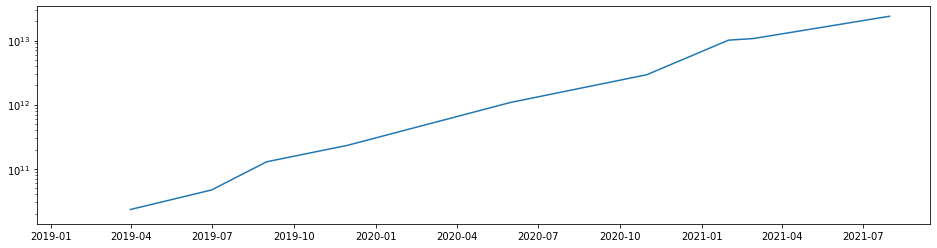

In [28]:
fig = plt.gcf()
fig.set_size_inches(16,4)
# plt.plot(df_merged.resample('m').first()['Money_Supply_M0'])
plt.yscale('log')
plt.plot(df_merged['Banks_Balance_Sheet'])

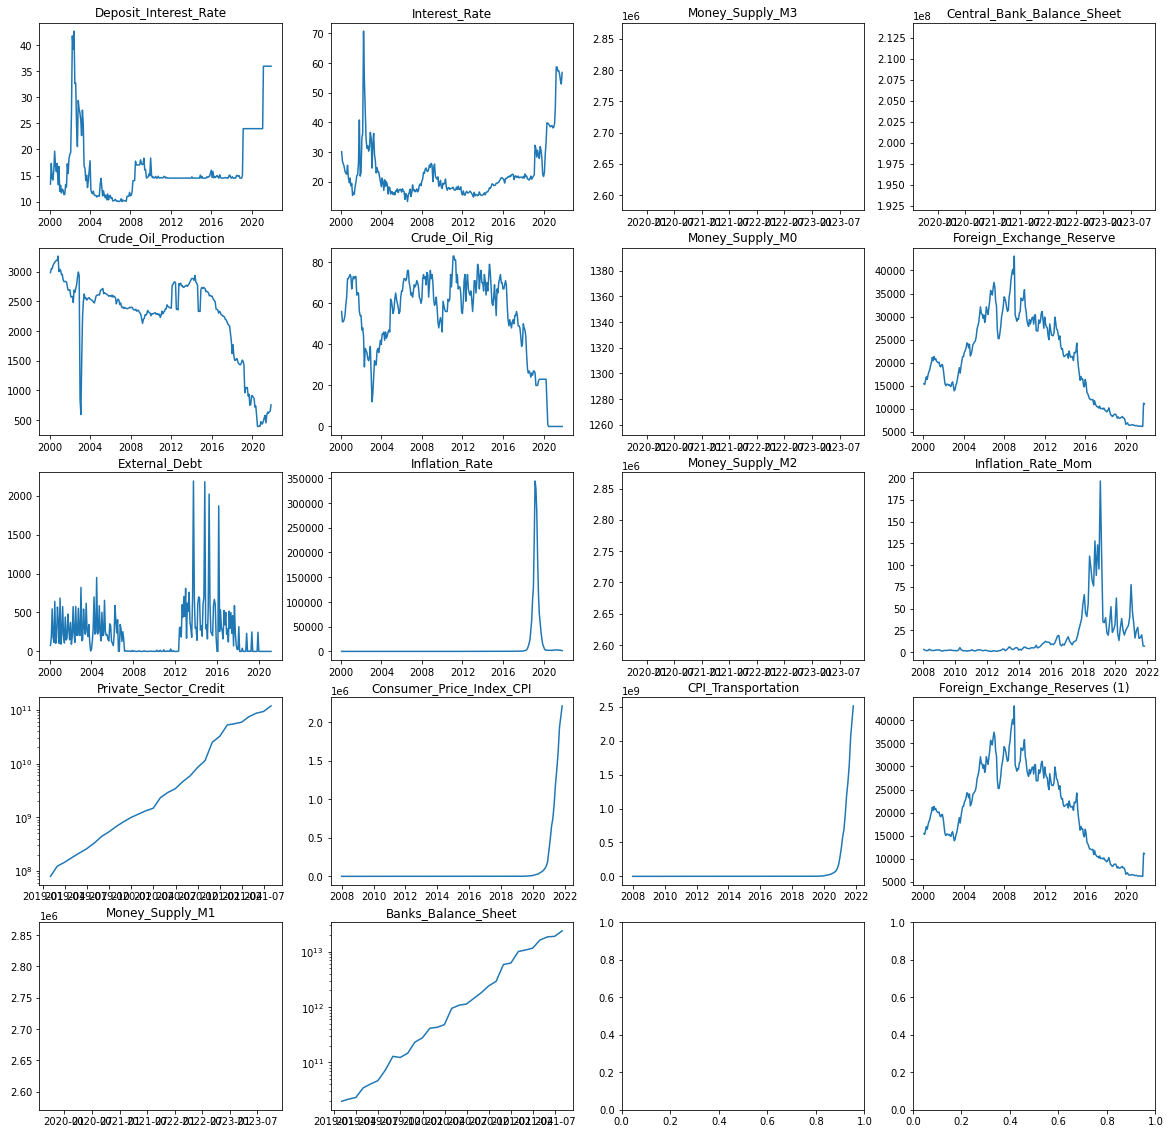

In [27]:
fig, axs = plt.subplots(5,4, figsize=(20,20))
axs = axs.flatten()

for idx, col in enumerate(list(df_merged.columns[1:])):
    axs[idx].plot(df_merged.resample('m').first()[col])
    axs[idx].set_title(col)
    temp_series = df_merged[col].dropna()
    temp_val = temp_series.iloc[-1]/temp_series.iloc[0]
    
    if temp_val > 100:
        axs[idx].set_yscale('log')

In [29]:
df_merged.to_csv('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/merge_trading_economics.csv')